<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-1

In [1]:
#@title Current Date
Today = '2021-09-11' #@param {type:"date"}

In [2]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "20156952" #@param {type:"string"}
Student_full_name = "Dáire Campbell" #@param {type:"string"}
#@markdown ---

In [3]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Draft' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# Introduction
* Explanation of the problem addressed.  
* Use mathematical notation and images.  
* Add any links to the references.  
* Write your work taking in consideration the reader.  
* Your work must be easy to understand and replicate.  


## MNIST dataset



The MNIST database  is a dataset of handwritten digits that has been and is extensively used in machine learning. There are $10$ classes, each image is $28\times28$ pixels and, therefore, each input is $x_i\in\mathbb{R}^{784}$. 

## Task

You have to extend the code to manage any arbitrary number of classes, in other words you have to implement a general-recipe multinomial logistic classifier and Bayesian multinomial logistic classifier.

You must then select  3 digits at random and perform  the following task. 

1. Your goal is to use Bayesian multinomial logistic regression (as in the road-sign notebook) to solve this classification problem. 

2. You can downsize the training dataset (e.g., 40% training and 60%testing) if the computation of the posterior takes too much time in your computer.

3. Use the posterior uncertainty to detect the instances (digits) in the test set that are hard to classify and remove them from the test-set.

4. Then you need to compute again the accuracy of the general-recipe logistic regression on the remaining (non-difficult) instances and comment on the result.

5. In practice, the task is to use uncertainty estimation to detect the difficult instances in the test-set. This is equivalent to refuse to classify all high-uncertainty instances or, in other words, when we are uncertain we say "I don't know" and we do not return any class. In this way, you will learn how uncertainty can be used to make safer decisions, by detecting the instances that are difficult to classify.


## Libraries

In [4]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Install uncommen libraries
# !/mnt/c/ubuntu20.04/masters_ai_ul/e-tivities/masters_in_ul/bin/python -m pip install --upgrade opencv-python
# !/mnt/c/ubuntu20.04/masters_ai_ul/e-tivities/masters_in_ul/bin/python -m pip install --upgrade scikit-image
# !/mnt/c/ubuntu20.04/masters_ai_ul/e-tivities/masters_in_ul/bin/python -m pip install --upgrade arviz
# !/mnt/c/ubuntu20.04/masters_ai_ul/e-tivities/masters_in_ul/bin/python -m pip install --upgrade pymc3

In [6]:
# Import libraries
# SKlearn Logestic Regression Model
from sklearn.linear_model import LogisticRegression

# SKlearn modeules for pre-processing, and validating
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.utils import shuffle

# SciPy models for optimisation
import scipy.optimize as optimize
from scipy.special import erf
from scipy.io import loadmat

# Generic Python modules
# Pandas for DataFrames
# Numpy for Numeric functions
# Random
import pandas as pd
import numpy as np
import random

# Visuals
# Seaborn for plots
# Tqdm to visualise the progress
import seaborn as sns
from tqdm import tqdm

# Functions for visual preprocessing
from skimage.io import imread, imshow
from skimage.color import rgb2gray
import matplotlib.image as mpimg

# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Arviz is used in exploratory analysis of Bayesian models
import arviz as az

# Pymc3 module for statistical modeling
import pymc3 as pm

# Change Jupyter display
from IPython.display import HTML

# Pickle saves/loads pythonic objects as bin
import pickle

# Theano efficiently evaluates mathematical expressions
# involving multi-dimensional arrays
import theano as tt

# Cv2 used for interacting with CV's
import cv2

# use seaborn plotting defaults
import seaborn as sns; sns.set()
plt.rcParams['figure.figsize'] = [12, 8] 

# Improve the Jupyter Notebook display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [7]:
# Setting a seed:
np.random.seed(123)

# 1. Preprocess Data
Below we will preprocess MNIST dataset.  
The MNIST dataset (Modified National Institute of Standards and Technology) is a large dataset of handwritten digits.  
It compromises of 28x28 pixel images of letters, and a label of what letter was written.  
There are 70'000 images (60'000 training and 10'000 testing).  
More information can be found here:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;https://en.wikipedia.org/wiki/MNIST_database


This will be done via:
* Loading the MNIST dataset
* Description of Data and Class Distribution
* Downsampling

To do:
* Add comments about any preprocessing you used if any.
* Explain what technique was used to split the dataset into train and test sets.
* Show bar graphs and/or plots to graphically explain the dataset.


#### Loading the MNIST dataset

In [8]:
# The code runs quicker locally, but
# I have a Colab version for distribution.
try:
    from google.colab import drive
    drive.mount('/content/drive')
    # Path, copy the path from your Drive
    Path = '/content/drive/MyDrive/Masters_in_AI/et5003/etivity1/'
except Exception as e:
    print("Running locally.")
    Path = "./"

Running locally.


In [9]:
# MNIST Data
train_data = Path + 'mnist_train.csv'
test_data = Path + 'mnist_test.csv'

# train data
df_train = pd.read_csv(train_data)
X_train = df_train.drop("label",axis=1).values
y_train = df_train.label.values
print(X_train.shape)

# test data
df_test = pd.read_csv(test_data)
X_test = df_test.drop("label",axis=1).values
y_test = df_test.label.values
print(X_test.shape)

(60000, 784)
(10000, 784)


In [10]:
# Normalizing the Inputs:
X_train = X_train/255
X_test = X_test/255

# Printing the new input range of values:
minv = np.min(X_train)
maxv = np.max(X_train)
print(minv,maxv)

0.0 1.0


### Description of Data:

In [11]:
# Number of examples
n_train =  len(X_train)
n_test =  len(X_test)

# Shape of an traffic sign image
image_shape = X_train.shape[1]

# unique classes/labels in the training dataset.
alltotal = set(y_train)
n_classes = len(alltotal)

print("Number of Training examples =", n_train)
print("Number of Test examples =", n_test)
print("Image input shape =", image_shape)
print("Number of classes =", n_classes)

Number of Training examples = 60000
Number of Test examples = 10000
Image input shape = 784
Number of classes = 10


### Class Distribution:

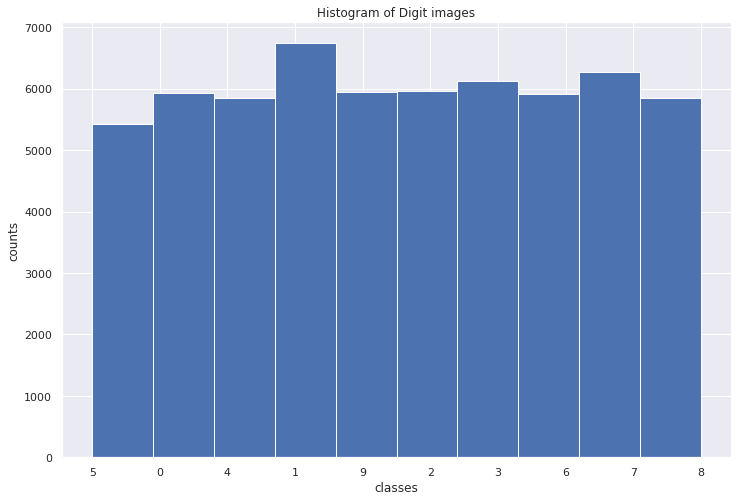

In [12]:
fig, ax = plt.subplots()
ind = np.arange(n_classes)

n, bins, patches = ax.hist([str(i) for i in y_train], n_classes)
ax.set_xlabel('classes')
ax.set_ylabel('counts')
ax.set_title(r'Histogram of Digit images')
plt.show()

## Downsampling

### Randomly selecting 3 of the 10 Digit Classes

In [13]:
# We select the number of Classes we want:
n_classes = 3

# Empty list to append the random digit classes we select:
classes = []

# We select 3 digits at random and make sure they are unique:
while len(classes) < n_classes:
    
    # Randomly drawing a digit from 0-9:
    num2choose = np.random.randint(0,10)

    # Append the digit if it's not already in our list of classes:
    if num2choose not in classes: 
        classes.append(num2choose)
        
        
# Sorting the Classes smallest to largest    
classes.sort()
# print classes selected
classes

[1, 2, 6]

In [14]:
# The number of instances we'll keep for each of our 3 digits:
inst_class = 5000

inputs = []
labels = []

# Loop to randomly sample the instances for each digit:
for r in classes:
    imgs = X_train[np.where(y_train==r)[0],:]
    inputs.append(imgs[np.random.permutation(imgs.shape[0]),:][0:inst_class,:])
    
    # Getting the minimum of number of images and number of instances
    # This stops errors if number of instances > number of images
    labels.append(np.ones(min(len(imgs), inst_class))*r)
    
# Shaping inputs and labels in the right format    
X_train = np.vstack(inputs).astype(np.float64)
y_train = np.hstack(labels)

New Classes Distribution

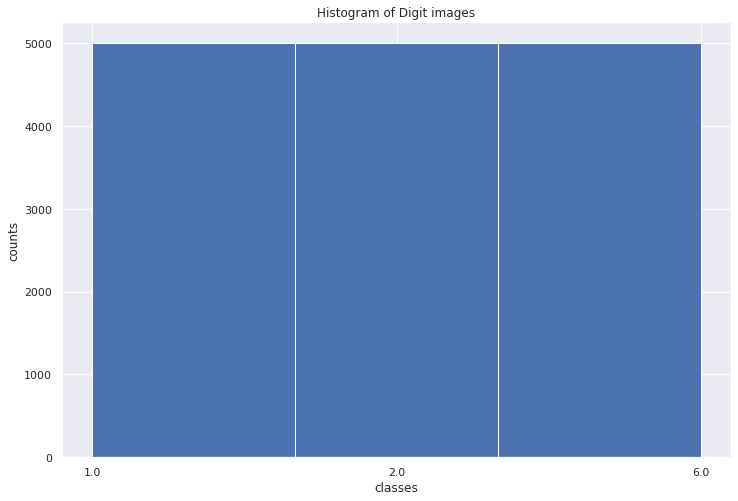

In [15]:
fig, ax = plt.subplots()
ind = np.arange(n_classes)

n, bins, patches = ax.hist([str(i) for i in y_train], len(set(y_train)))
ax.set_xlabel('classes')
ax.set_ylabel('counts')
ax.set_title(r'Histogram of Digit images')
plt.show()

In [16]:
# plot digits
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image,  cmap='gist_yarg', **options)
    plt.axis("off")

In [17]:
# A function to return random indices for a class

def random_indices_of_labels(y_train, ind = 2):
    """
    Function to get generate random indices corresponding
        to the labels.
        
    ::param y_train: (numpy array)
    ::param ind: (int) Number of indices per class
    ::return: (list[int])
    """
    r_indices = []
    for i in set(y_train):
        r_indices += np.random.choice(
            [y for y, x in enumerate(y_train) if x == i], ind)\
        .tolist()
    return r_indices

Text(0.5, 1.0, 'Original')

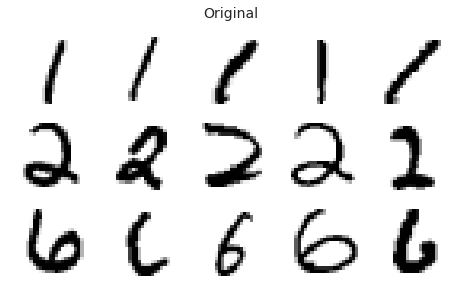

In [18]:
# Show a few instances from each Digit:
plt.figure(figsize=(8,8))

# Selecting a few label indices from each of the 3 classes to show:
label_indices = random_indices_of_labels(y_train, 5)

# Plotting 'original' image
plot_digits(X_train[label_indices,:],images_per_row=5)
plt.title("Original", fontsize=14)

###  Splitting the Training data into both Training and Validation Sets:

- Although this is the Training set, we can still set aside some samples (for instance 20%) of the 1,500 instances we have for Model Validation purposes.


- With that Validation Set, we can then select the amount of Uncertainty we are happy with from our Model to use out of sample on other unseen data.


- We can then test out how well our decision performs on the Test Set that we put aside earlier.

In [19]:
len(X_train), len(y_train)

(15000, 15000)

In [20]:
### Split tha dataset in training and validation sets
# choose the fraction of your validation data from the training set
w = 0.20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=w, random_state=0)
 
# Shuffling the training instaces around to randomize the order of inputs to the model:
X_train, y_train = shuffle(X_train, y_train)

In [21]:
# print shape of your validation and training set

print("Shape of validation dataset: ", X_train.shape)
print("Shape of test dataset: ", X_val.shape)


Shape of validation dataset:  (12000, 784)
Shape of test dataset:  (3000, 784)


### Encoding the Class labels for the Probabilistic ML Model:

This is an example:

- **[1,0,0]** for first digit
- **[0,1,0]** for second digit
- **[0,0,1]** for third digit

In [22]:
y_train_bin = sklearn.preprocessing.LabelBinarizer().fit_transform(y_train.reshape(-1,1))
y_val_bin = sklearn.preprocessing.LabelBinarizer().fit_transform(y_val.reshape(-1,1))

y_train_bin[0]

array([0, 0, 1])

### General-Recipe ML
SKlearn model:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

This is a quick Logestic Regression model to help us have a better idea of the data classification.

In [23]:
# model
model_log = LogisticRegression(random_state=0, max_iter=2000, C=100, solver='lbfgs', multi_class='multinomial')\
.fit(X_train, y_train)

# Classification:
y_pred_log = model_log.predict(X_val)
y_pred_logi_prob = model_log.predict_proba(X_val)

# Maybe taking the maximum probability 
# in any of the classes for each observation
maximum_prob = y_pred_logi_prob.max(axis = 1)

# Computing the Accuracy:
accuracy_score(y_pred_log, y_val)

0.974

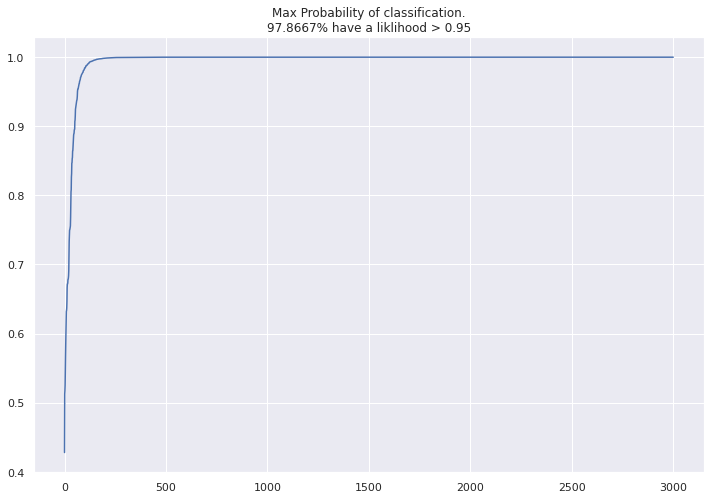

In [24]:
thresh = 0.95
perc = round(
    sum(maximum_prob > thresh)*100/len(maximum_prob), 4)

ax = plt.axes()
sns.lineplot(range(len(maximum_prob)), np.sort(maximum_prob), ax = ax)

ax.set_title(f'Max Probability of classification.\n{perc}% have a liklihood > {thresh}')
plt.show()

The above graph shows that the vast majority of predictions have greater than 0.95 probability of being correct.  
However, for ~5-8% of the classifications, the liklihood is not as confident.

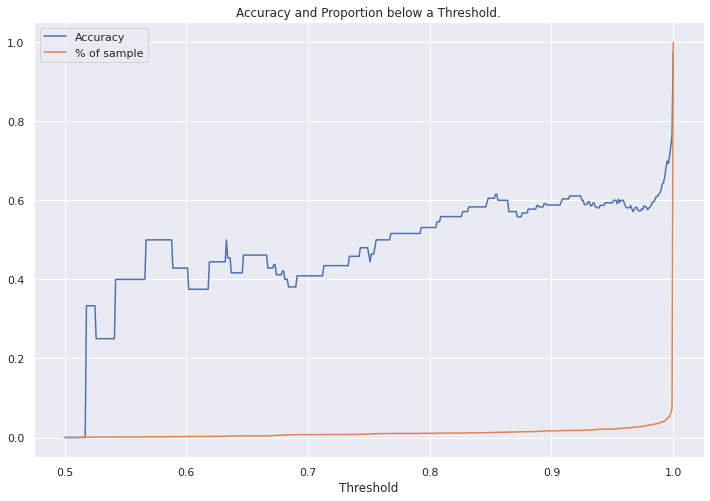

In [25]:
# Here we check the count per confidence thresholds.
# We also get the accuracy of data below confidence.
# The hope is that we can see a good threshold for unknowns
step = 0.001
confidence_ranges = np.arange(0.5, 1+step, step)

accuracy_l = []
count_perc_l = []

for con_r in confidence_ranges:
    filt = maximum_prob <= float(con_r)
    accuracy_l +=[accuracy_score(y_pred_log[filt], y_val[filt])]
    count_perc_l +=[len(y_pred_log[filt])/len(y_pred_log)]


plt.plot(confidence_ranges, accuracy_l, label='Accuracy')
plt.plot(confidence_ranges, count_perc_l, label='% of sample')
plt.legend(loc='best')
plt.title(f"Accuracy and Proportion below a Threshold.")
plt.xlabel("Threshold")
plt.show()

The above graph shows that the model is uncertian (accuracy of ~ 0.6) until a threshold of 0.99.  
This is because the vast majoity of the data has a prediction of greater than 0.99.  
Hence anything with a confidence less than 0.99 should be considered Unknown.

The high accuracy at the start of the graph can be explained by the sparse data.

In [26]:
# Apply General-Recipe Model on test-data
# First filter test data onto only teh 3 classes created above
filt = np.isin(y_test, classes)
X_test_ = X_test[filt]
y_test_ = y_test[filt]

# Classification:
y_pred_log = model_log.predict(X_test_)
y_pred_logi_prob = model_log.predict_proba(X_test_)

# Maybe taking the maximum probability 
# in any of the classes for each observation
maximum_prob = y_pred_logi_prob.max(axis = 1)

# Computing the Accuracy:
accuracy_score(y_pred_log, y_test_)

0.9744

In [27]:
# Removing the posteriety of Unknown
filt = maximum_prob > 0.99

# Computing the Accuracy:
print(f"""
New Accuracy: {accuracy_score(y_pred_log[filt], y_test_[filt])}
# Unknown: {sum(~filt)} out of {len(filt)}""")


New Accuracy: 0.9864013266998342
# Unknown: 110 out of 3125


###### Comment:
Removing uncertainty estimation increased the accuracy of the test dataset.  
However only slightly

### Probabilistic Multinomial Logistic Regression:

##### Warning:
Below code can take a while to run.

In [28]:
nf = X_train.shape[1]
# number of classes
nc = len(classes)
# floatX = float32 (actually flaot 64)
floatX = tt.config.floatX

# Initial weightings
init_b = np.random.randn(nf, nc-1).astype(floatX)
init_a = np.random.randn(nc-1).astype(floatX)

The Multinomial Logistic Regression has some parameters:

- $\alpha$, which is the intercept term:

- $\beta$, which is a vector of coefficients which give a weighting to the importance of each input feature:


In [29]:
with pm.Model() as multi_logistic:
    # Prior
    β = pm.Normal('beta', 0, sigma=100, shape=(nf, nc-1), testval=init_b)
    α = pm.Normal('alpha', 0, sigma=100, shape=(nc-1,), testval=init_a)
    
    # we need to consider nc-1 features because the model is not identifiable
    # the softmax turns a vector into a probability that sums up to one
    # therefore we add zeros to go back to dimension nc
    # so that softmax returns a vector of dimension nc
    β1  = tt.tensor.concatenate([np.zeros((nf,1)),β ],axis=1)
    α1  = tt.tensor.concatenate([[0],α ],)
    
    # Likelihood
    mu = pm.math.matrix_dot(X_train,β1) + α1
    # It doesn't work if the problem is binary
    p = tt.tensor.nnet.nnet.softmax(mu)
    observed = pm.Multinomial('likelihood', p=p, n=1, observed=y_train_bin)

In [30]:
# Fit the model
with multi_logistic:
    #approx = pm.fit(300000, method='advi') # takes longer
    approx = pm.fit(3000, method='advi')

Finished [100%]: Average Loss = 18,242


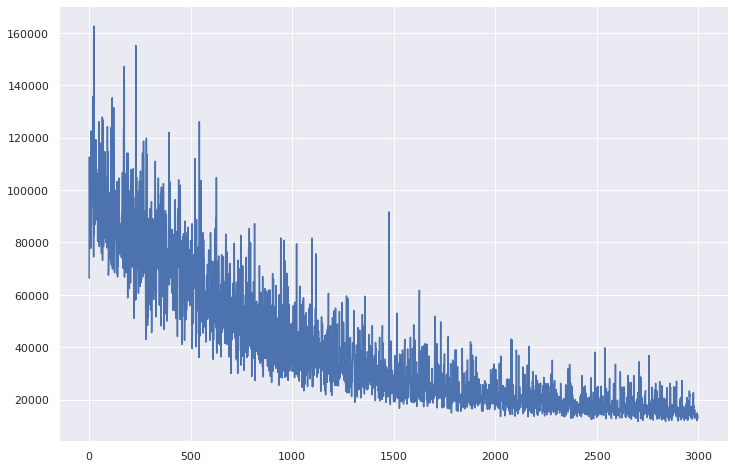

In [31]:
plt.plot(approx.hist)

In [32]:
dd = 300
posterior = approx.sample(draws=dd)

test image #48
posterior sample #299
true class= 6.0
classes: [1, 2, 6]
estimated prob= [0.00000534 0.         0.99999466]


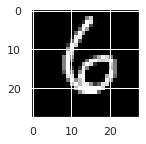

In [33]:
## The softmax function transforms each element of a collection by computing the exponential
#  of each element divided by the sum of the exponentials of all the elements.
from scipy.special import softmax

#select an image in the test set

i = random.randint(0, dd)

#select a sample in the posterior
s = random.randint(0, dd)


beta  = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
alpha = np.hstack([[0],  posterior['alpha'][s,:] ])
image = X_val[i,:].reshape(28,28)
plt.figure(figsize=(2,2))
plt.imshow(image,cmap="Greys_r")
np.set_printoptions(suppress=True)

print("test image #" + str(i))
print("posterior sample #" + str(s))
print("true class=", y_val[i])
print("classes: " + str(classes))
print("estimated prob=",softmax((np.array([X_val[i,:].dot(beta) + alpha])))[0,:])

The below can take a long time to run.

In [34]:
# Bayesian prediction
# return the class that has the highest posterior probability
y_pred_Bayesian=[]

for i in tqdm(range(X_val.shape[0])):
    val=np.zeros((1,len(classes)))
    
    for s in range(posterior['beta'].shape[0]):
        beta = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
        alpha = np.hstack([[0],  posterior['alpha'][s,:] ])     
        val = val + softmax((np.array([X_val[i,:].dot(beta) + alpha])))
    
    mean_probability = val/posterior['beta'].shape[0]
    y_pred_Bayesian.append( np.argmax(mean_probability))


100%|██████████| 3000/3000 [02:13<00:00, 22.52it/s]


In [35]:
# using validation: y_val
print("Accuracy=", accuracy_score(np.array(classes)[y_pred_Bayesian], y_val))

Accuracy= 0.9296666666666666


## Selecting different instances

In [36]:
y_predB=[]

for i in tqdm(range(X_val.shape[0])):
    #print(i)
    val=[]

    for s in range(posterior['beta'].shape[0]):
        beta = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
        alpha = np.hstack([[0],  posterior['alpha'][s,:] ])
        val.append(softmax((np.array([X_val[i,:].dot(beta) + alpha])))[0,:])

    #mean probability
    valmean = np.mean(val,axis=0)
    #class with maximum mean probability
    classmax = np.argmax(valmean)
    #ranks
    ranks = np.array(val.copy())
    ranks   = ranks  *0 #init
    colmax = np.argmax(np.array(val),axis=1)
    ranks[np.arange(0,len(colmax)),colmax]=1
     
    y_predB.append( [classmax, valmean[classmax], np.std(ranks,axis=0)[classmax]])

    
y_predB= np.array(y_predB)

100%|██████████| 3000/3000 [02:14<00:00, 22.36it/s]


In [37]:
# Bayesian prediction
# return the class that has the highest posterior probability
y_pred_Bayesian=[]

for i in tqdm(range(X_val.shape[0])):
    val=np.zeros((1,len(classes)))
    
    for s in range(posterior['beta'].shape[0]):
        beta = np.hstack([np.zeros((nf,1)),  posterior['beta'][s,:] ])
        alpha = np.hstack([[0],  posterior['alpha'][s,:] ])     
        val = val + softmax((np.array([X_val[i,:].dot(beta) + alpha])))
    
    mean_probability = val/posterior['beta'].shape[0]
    y_pred_Bayesian.append( np.argmax(mean_probability))


100%|██████████| 3000/3000 [02:12<00:00, 22.63it/s]


In [38]:
## Difficult & easy instances

easy = np.argsort(y_predB[:,2])
print("Accuracy in easy instances =", accuracy_score(y_pred_log[easy[0:100]], y_val[easy[0:100]]))

difficult = np.argsort(-y_predB[:,2])
print("Accuracy in difficult instances =", accuracy_score(y_pred_log[difficult[0:100]], y_val[difficult[0:100]]))

Accuracy in easy instances = 0.3
Accuracy in difficult instances = 0.37


NameError: name 'X_valv' is not defined

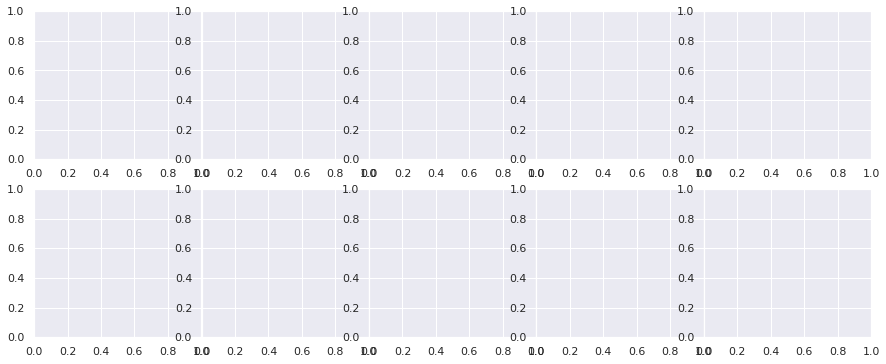

In [39]:
# show 10 random 'easy' images
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

for i in range(10):
    index = easy[i]
    image = X_valv[index,:].reshape(28,28)
    axs[i].axis('off')
    axs[i].imshow(image,cmap="Greys_r")
    

In [ ]:

# show 10 random 'difficult' images
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = difficult[i]
    image = X_valv[index,:].reshape(28,28)
    axs[i].axis('off')
    axs[i].imshow(image,cmap="Greys_r")
    

## Summary

Populate this section with all of your findings and comments fron the discussion with your peers.